## 2-4-4. Feature Selection Using Hybrid Method (Recursive feature elimination with Feature-engine)

### A. Import Python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.pipeline import Pipeline

from feature_engine.selection import (
    RecursiveFeatureElimination,
    DropConstantFeatures,
    DropDuplicateFeatures,
)

### B. Set City Name and load City Data

In [2]:
# set city name
city_data = "1_goyang_city.xlsx"
CITY_NAME_Eng = "GoYang-City"

In [3]:
# Read excel file using pandas
df = pd.read_excel(open(f"../../data/{city_data}", 'rb'), sheet_name="training", header=4, index_col=0)
# Remove unnecessary columns for this analysis
df = df.iloc[2:]
# Change Date Format and Set Date as index
df.index = pd.to_datetime(df.index.str.strip(), format='%Y-%m')
df.index.name = "date"
# Change data format from "Object" to "Float"
df["water_supply"] = df.water_supply.astype(float)
df["Total_Population"] = df.Total_Population.astype(float)
# Delete unnecessary columns 
df.drop(columns=df.columns[19:21], inplace=True)
df.drop(columns=df.columns[22:23], inplace=True)
# Select clean data
df = df.loc["2010-01-01":]
df

,water_supply,Total_Population,Households,Population_per_Households,Male_Population,Female_Population,Male_Female_Ratio,Population_aging_Ratio,Power_usage,Num_of_Business,...,personal_expense,benefits_vs_personal_expense,employment_ratio,employment_insurance_ratio,Average_Temp,Monthly_Rainfall,Average_Relative_Humadity,Ground_Temp,Average_Wind,Average_Pressure
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,282265.709677,939497.0,353741.0,2.655889,463878.0,475619.0,0.975314,0.088,434436000.0,20326.0,...,104371555.0,0.191,99001.0,0.105377,-4.5,29.3,0.65,-1.2,2.3,1013.6
2010-02-01,273685.892857,940639.0,354266.0,2.655177,464518.0,476121.0,0.975630,0.088,418156000.0,20685.0,...,104371555.0,0.191,99893.0,0.106197,1.4,55.3,0.59,1.4,2.4,1010.7
2010-03-01,269918.193548,940982.0,354003.0,2.658119,464740.0,476242.0,0.975848,0.088,346653000.0,20809.0,...,104371555.0,0.191,99678.0,0.105930,4.3,82.5,0.59,5.0,2.9,1009.6
2010-04-01,274462.700000,941737.0,354192.0,2.658832,465148.0,476589.0,0.975994,0.088,356701000.0,21857.0,...,104371555.0,0.191,101594.0,0.107879,9.5,62.8,0.54,10.8,2.9,1007.4
2010-05-01,288537.806452,941724.0,354157.0,2.659058,465110.0,476614.0,0.975863,0.089,313793000.0,21739.0,...,104371555.0,0.191,102073.0,0.108390,17.2,124.0,0.62,18.7,2.6,1000.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,354382.451613,1080896.0,454793.0,2.376677,528972.0,551924.0,0.958415,0.140,487867544.0,46416.0,...,218316665.0,0.293,171845.0,0.158984,25.9,211.2,0.74,28.2,2.1,998.6
2021-09-01,343537.800000,1080787.0,455501.0,2.372743,528911.0,551876.0,0.958387,0.141,401433572.0,45514.0,...,218316665.0,0.293,172771.0,0.159857,22.6,131.0,0.71,24.6,2.3,1003.4
2021-10-01,340126.806452,1080240.0,455845.0,2.369753,528683.0,551557.0,0.958528,0.142,358286760.0,45839.0,...,218316665.0,0.293,173486.0,0.160599,15.6,57.0,0.70,16.7,2.1,1011.0


### C. Hybrid Methods: Selection using Recursive feature elimination with Feature-engine

* Split Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['water_supply'], axis=1),
    df['water_supply'],
    test_size=0.2,
    random_state=0)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train.shape, X_test.shape

((115, 24), (29, 24))

#### Recursive Feature Elimination

In [5]:
# build initial model using all the features
model = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)

# Setup the RFE selector

sel = RecursiveFeatureElimination(
    variables=None, # automatically evaluate all numerical variables
    estimator = model, # the ML model
    scoring = 'r2', # the metric we want to evalute
    threshold = 0.001, # the maximum performance drop allowed to remove a feature
    cv=3, # cross-validation
)

# this may take quite a while, because
# we are building a lot of models with cross-validation
sel.fit(X_train, y_train)

RecursiveFeatureElimination(estimator=GradientBoostingRegressor(max_depth=4,
                                                                n_estimators=10,
                                                                random_state=10),
                            scoring='r2', threshold=0.001)

In [6]:
# performance of model trained using all features

sel.initial_model_performance_

0.783337805371537

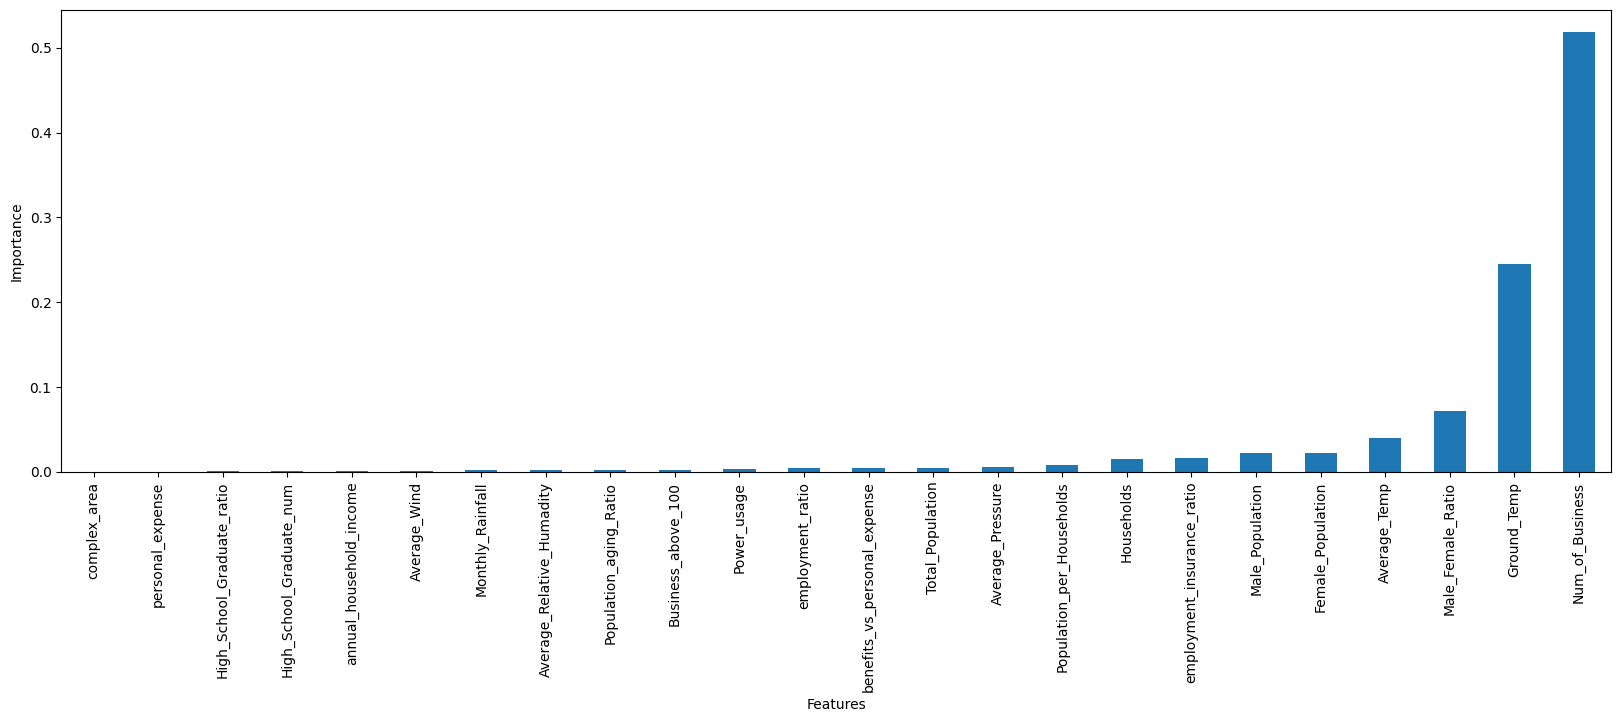

In [7]:
# importance of all features based of initial model

sel.feature_importances_.plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

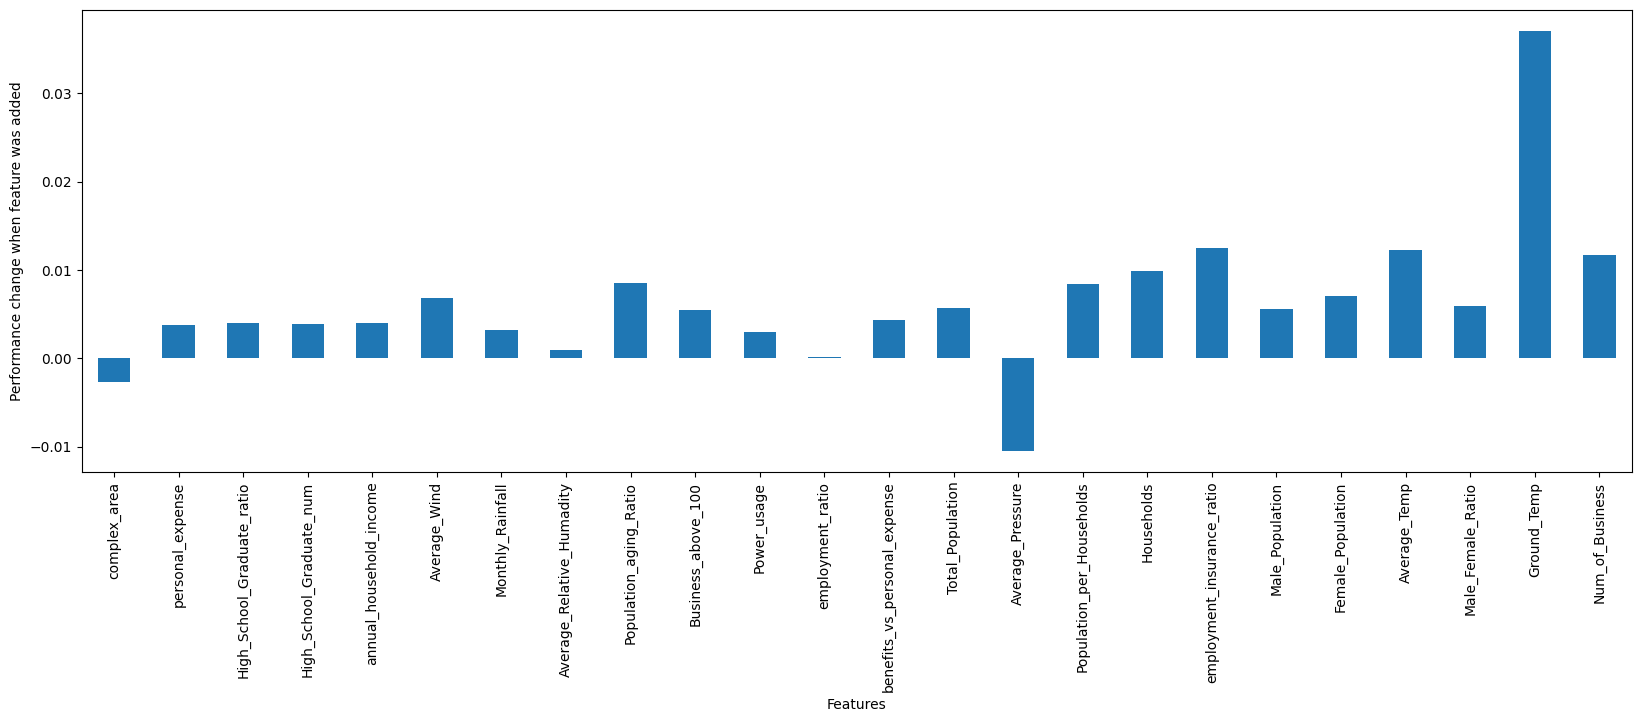

In [8]:
pd.Series(sel.performance_drifts_).plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Performance change when feature was added')
plt.show()

In [9]:
# Number of features that will be removed

len(sel.features_to_drop_)

4

In [10]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((115, 20), (29, 20))

In [11]:
X_train.columns

Index(['Total_Population', 'Households', 'Population_per_Households',
       'Male_Population', 'Female_Population', 'Male_Female_Ratio',
       'Population_aging_Ratio', 'Power_usage', 'Num_of_Business',
       'Business_above_100', 'annual_household_income',
       'High_School_Graduate_num', 'High_School_Graduate_ratio',
       'personal_expense', 'benefits_vs_personal_expense',
       'employment_insurance_ratio', 'Average_Temp', 'Monthly_Rainfall',
       'Ground_Temp', 'Average_Wind'],
      dtype='object')

In [12]:
results_f = pd.DataFrame()
results_f["hybrid RFE with Feature Engine"] = [list(X_train.columns.values)]
results_f.to_csv(f'./{CITY_NAME_Eng}_hybrid_RFE_with_FE_results.csv')
results_f

,hybrid RFE with Feature Engine
0,"[Total_Population, Households, Population_per_..."


In [13]:
# finally let's test the performance of the model 
# built on the selected features

# fit the model with the selected features
model.fit(X_train, y_train)

# make predictions
y_pred_test = model.predict(X_test)

# calculate roc-auc
r2_final = r2_score(y_test, y_pred_test)
print('Test selected features r2 = %f' % (r2_final))

Test selected features r2 = 0.768301
